<a href="https://colab.research.google.com/github/Victornovikov/msai-robotics/blob/master/Homework_1__Kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


k = list()

########################################

def filter(x, E):
    x_hist = np.empty((len(measurements), 2))
    v_hist = np.empty((len(measurements), 2))
    for n in range(len(measurements)):
        
        # prediction
        x = (F * x) + u
        E = F * E * F.transpose()

        # measurement update
        Z = np.matrix([measurements[n]])
        S = H * E * H.transpose() + R
        K = E * H.transpose() * np.linalg.inv(S)
        k.append(K)
        x = x + (K * (Z.transpose() - (H * x)))
        E = (I - (K * H)) * E
        
        # print('x= ')
        # print(x)
        x_hist[n, :] = x[0:2, :].flatten()
        v_hist[n, :] = x[2:, :].flatten()
        # print('E= ')
        # print(E)
        # print('K= ')
        # print(K)
    return x_hist, v_hist, k
########################################

In [ ]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1000, 0], [0, 0, 0, 1000]])
# prediction made based on motion model p_t = p_{t-1} + \delta{t}v{t-1}
F = np.matrix([[1,0, dt, 0],[0,1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])
 # measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = [[0.1, 0], [0, 0.1]]
# 4D identity matrix
I = np.identity(n=4).T


In [ ]:
def visualize(x, v, k):
  df_experiment_x = pd.DataFrame(x, columns=['x', 'y'])
  df_experiment_v = pd.DataFrame(v, columns=['v_x', 'v_y'])
  print(df_experiment_x)
  print(df_experiment_v)

  sns.relplot(x='x', y='y', sort=False, kind="line", data=df_experiment_x)
  sns.relplot(x='v_x', y='v_y', sort=False, kind="line", data=df_experiment_v)
  
  # fig, axs = plt.subplots(ncols=len(measurements))
  print('-------')
  # for i in range(len(measurements)):
  #   print('k on step #', i)
  #   print(k[i])

In [ ]:
print("### First Experiment ###")
measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = [4., 12.]


x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### First Experiment ###


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

          x          y
0  4.990099  10.020792
1  5.996008   8.008383
2  6.997859   6.004497
3  7.998667   4.002799
4  8.999091   2.001909
5  9.999341   0.001384
        v_x        v_y
0  9.900990 -20.792079
1  9.980040 -20.958084
2  9.992862 -20.985011
3  9.996668 -20.993002
4  9.998182 -20.996183
5  9.998901 -20.997693
-------


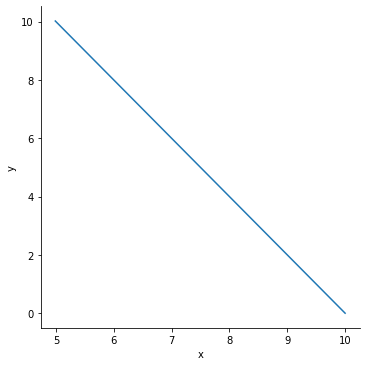

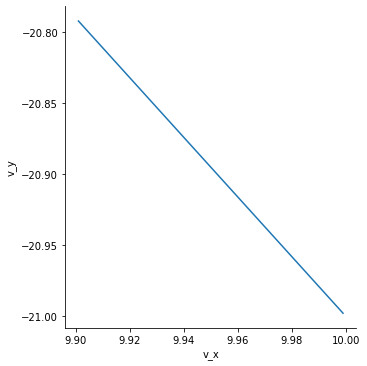

In [ ]:
visualize(*filter(x, E))

Visualize the components of the $ K $ matrix below

In [ ]:
print("### Second Experiment ###")
measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
initial_xy = [-4., 8.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Second Experiment ###


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

           x         y
0   0.950495  4.040594
1   5.980040  0.016367
2  10.989293 -3.991221
3  15.993336 -7.994535
         v_x        v_y
0  49.504950 -40.594059
1  49.900200 -40.918164
2  49.964311 -40.970735
3  49.983339 -40.986338
-------


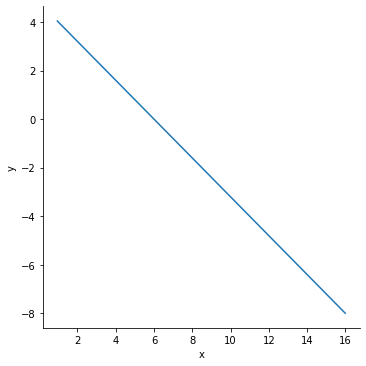

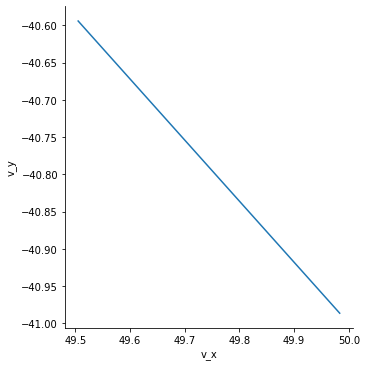

In [ ]:
visualize(*filter(x, E))

Visualize the components of the $ K $ matrix below

In [ ]:
print("### Third Experiment ###")
measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
initial_xy = [1., 19.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Third Experiment ###


     x          y
0  1.0  17.020792
1  1.0  15.008383
2  1.0  13.004497
3  1.0  11.002799
   v_x        v_y
0  0.0 -20.792079
1  0.0 -20.958084
2  0.0 -20.985011
3  0.0 -20.993002
-------


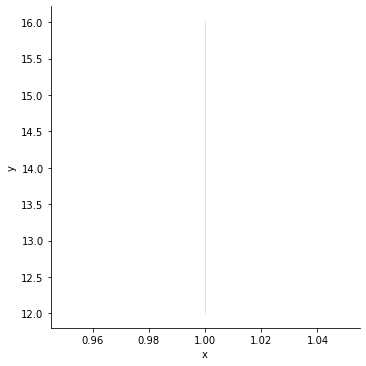

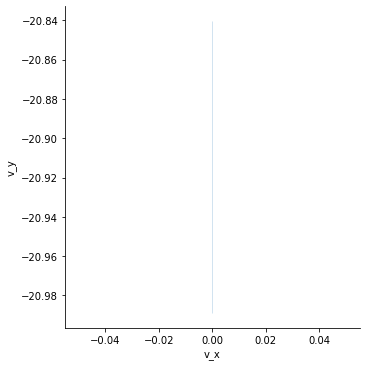

In [ ]:
visualize(*filter(x, E))

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Visualize the components of the $ K $ matrix below